In [1]:
import torch

In [2]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [3]:
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [4]:
x = x.unsqueeze(0)
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([1, 3, 3])
torch.Size([1, 3, 3])
3


In [5]:
x=x.squeeze(0)
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [6]:
x.view(3,3,1)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

## 3.1.2

In [7]:
w = torch.randn(5,3,dtype = torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print(w.size())
print(x.size())
print(w)
print(x)

torch.Size([5, 3])
torch.Size([3, 2])
tensor([[-0.7233,  2.2867,  1.7911],
        [-0.2724,  0.3364, -0.3320],
        [-1.4370,  0.3589, -1.4845],
        [-0.7828,  1.5297,  0.4554],
        [-0.9036,  0.6072, -1.0719]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [8]:
b = torch.randn(5,2)


In [9]:
wx = w.mm(x)

In [10]:
result = b+wx
result

tensor([[15.5550, 17.7229],
        [-0.3441, -2.5930],
        [-8.0978, -9.8078],
        [ 7.4150,  6.8850],
        [-4.6354, -6.9994]])

## 3.1.3 Autograd

In [11]:
w = torch.tensor(1.0,requires_grad=True)
a=w*3
print(a)
l = a**2
print(l)

tensor(3., grad_fn=<MulBackward0>)
tensor(9., grad_fn=<PowBackward0>)


In [12]:
l.backward()
print('l을w로 미분한 값',w.grad)

l을w로 미분한 값 tensor(18.)


# 3.2 경사하강법으로 이미지 복원

In [13]:
import torch
import pickle
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [14]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding='latin1'))
print(broken_image.size())
# plt.imshow(broken_image.view(100,100))

torch.Size([10000])


In [15]:
tf = transforms.ToPILImage()
img_t = tf(broken_image.view(100,100))
# img_t.show()

In [16]:
'''plt.imshow(broken_image.view(100,100))'''

'plt.imshow(broken_image.view(100,100))'

In [17]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [29]:
def distance_loss(hypothesis, broken_image):

    return torch.dist(hypothesis, broken_image)

In [19]:
random_tensor = torch.randn(10000,dtype=torch.float)

In [28]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_()
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis,broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i %1000==0:
        print(f'Los at {i} = {loss.item()}')

torch.Size([10000])
torch.Size([10000])
Los at 0 = 0.021167948842048645
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Size([10000])
torch.Si

KeyboardInterrupt: 

In [22]:
random_tensor.size()

torch.Size([10000])

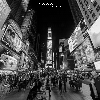

In [25]:
img = tf(random_tensor.view(100,100))
display(img)

In [26]:
'''plt.imshow(random_tensor.view(100,100).data)'''

'plt.imshow(random_tensor.view(100,100).data)'

# 3.3 신경망 모델 구현하기

In [92]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [106]:
n_dim =2
X_train, y_train = make_blobs(n_samples=80,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3)
X_test, y_test = make_blobs(n_samples=20,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3)

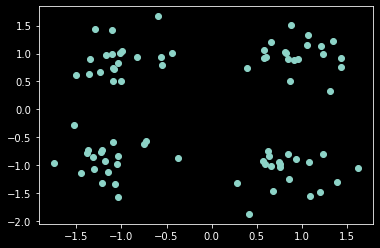

In [107]:
import pandas as pd
pd.DataFrame(X_train)
plt.scatter(X_train[:,0],X_train[:,1])

In [108]:
X_train.shape

(80, 2)

In [109]:
def label_map(y_,from_,to_):
    y=np.copy(y_)
    for f in from_:
        y[y_==f]=to_
    return y

In [110]:
y_train = label_map(y_train,[0,1],0)
y_train = label_map(y_train,[2,3],1)
y_test = label_map(y_test,[0,1],0)
y_test = label_map(y_test,[2,3],1)

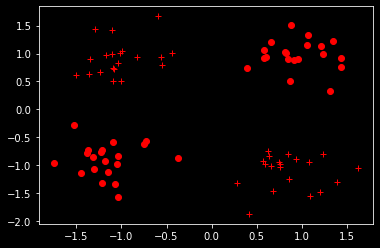

In [111]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(X_train, y_train, c='r')
plt.show()

In [112]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [113]:
class NeuralNet(torch.nn.Module):
    def __init__(self,input_size,hidden_size):
        super(NeuralNet,self).__init__()
        self.input_size =input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size,self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size,1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self,input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output
        
        

In [114]:
model = NeuralNet(2,5)
lr = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer =torch.optim.SGD(model.parameters(),lr =lr)


Before Training, test loss is 0.7155610918998718


In [118]:
model.eval()
test_loss_before = criterion(model(X_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.05422500520944595


In [115]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(X_train)
    train_loss =criterion(train_output.squeeze(),y_train)
    if epoch%100==0:
        print(f'Train loss at {epoch} is {train_loss.item()}')
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7144274711608887
Train loss at 100 is 0.6644461154937744
Train loss at 200 is 0.6162450909614563
Train loss at 300 is 0.5424907803535461
Train loss at 400 is 0.4453046917915344
Train loss at 500 is 0.3524423837661743
Train loss at 600 is 0.2826060950756073
Train loss at 700 is 0.23297102749347687
Train loss at 800 is 0.1966196894645691
Train loss at 900 is 0.16885025799274445
Train loss at 1000 is 0.14746221899986267
Train loss at 1100 is 0.13074949383735657
Train loss at 1200 is 0.1172695904970169
Train loss at 1300 is 0.10599841922521591
Train loss at 1400 is 0.09644802659749985
Train loss at 1500 is 0.08831106126308441
Train loss at 1600 is 0.08132807910442352
Train loss at 1700 is 0.07525445520877838
Train loss at 1800 is 0.06993626058101654
Train loss at 1900 is 0.06525156646966934


In [120]:
model.eval()
criterion(torch.squeeze(model(X_test)),y_test)

tensor(0.0542, grad_fn=<BinaryCrossEntropyBackward0>)

In [121]:
model.state_dict()

OrderedDict([('linear_1.weight',
              tensor([[ 1.3583,  1.8778],
                      [-1.3461,  1.3950],
                      [-2.0047, -1.0277],
                      [-0.8795, -0.3817],
                      [ 0.3212,  0.1736]])),
             ('linear_1.bias',
              tensor([-0.0221, -0.2143, -0.5024, -0.0052, -0.5660])),
             ('linear_2.weight',
              tensor([[-2.2475,  1.9195, -2.1661, -0.6385,  0.0482]])),
             ('linear_2.bias', tensor([2.1584]))])

In [117]:

y_test.shape

torch.Size([20])